In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lista_obj = []
lista_tempos = []
for i in range(1,4): 
    with open("objetivos_GA_tunning{}.pkl".format(i), "rb") as infile:
        dados1 = pickle.load(infile)
        objetivos_pandas = pd.DataFrame(dados1)
        objetivos_pandas.iloc[20]
        objetivos_unstack = objetivos_pandas.iloc[20].unstack(level=-1)
        objetivos_unstack
        lista_obj.append(objetivos_unstack.transpose())
        

    with open("tempos_pandas_tunning{}.pkl".format(i), "rb") as infile:
        tempos1 = pickle.load(infile) 
        tempos_pandas = pd.Series(tempos1)
        tempos_unstack = tempos_pandas.unstack(level=-1)
        lista_tempos.append(tempos_unstack.transpose())      

In [3]:



objetivos_pandas = pd.concat(lista_obj)
tempos_pandas = pd.concat(lista_tempos)

In [4]:
conjuntos = [200]
problemas = [3]
lista_hs = [0.2,0.4,0.6,0.8]
lista_crossover = [0 , 1]
lista_elitismo = [0.35 , 0.75 , 1]
lista_so_filho_mutante = [0 , 1]
lista_taxa_mutacao = [0.2 , 1 , 5]

In [5]:
objetivos_pandas

200                                                              \
        0.2                                                               
          3                                                               
        0.2                                                         1.0   
          0                             1                             0   
       0.35      0.75      1.00      0.35      0.75      1.00      0.35   
0  488976.0  488763.0  488665.0  489549.0  489727.0  489664.0  489084.0   
1  488745.0  488665.0  488665.0  489786.0  489696.0  489071.0  488934.0   
0  488665.0  488665.0  488665.0  490199.0  489305.0  490116.0  489044.0   
1  488937.0  488665.0  488665.0  490167.0  490535.0  490273.0  489068.0   
0  488683.0  488665.0  488665.0  490431.0  490376.0  489832.0  489095.0   
1  488665.0  488684.0  488665.0  490074.0  490558.0  489422.0  489000.0   

                                 ...                                          \
                                 ...       0.8                                 
                                 ...         3                                 
                                 ...       1.0                                 
                              1  ...         0         1                       
       0.75      1.00      0.35  ...      1.00      0.35      0.75      1.00   
0  488665.0  488683.0  488777.0  ...  254476.0  254478.0  254478.0  254478.0   
1  488665.0  488665.0  488835.0  ...  254476.0  254478.0  254476.0  254476.0   
0  488665.0  488665.0  488767.0  ...  254476.0  254478.0  254478.0  254476.0   
1  488753.0  488665.0  488777.0  ...  254476.0  254478.0  254476.0  254478.0   
0  488665.0  488665.0  488831.0  ...  254476.0  254478.0  254478.0  254478.0   
1  488665.0  488665.0  488692.0  ...  254476.0  254478.0  254478.0  254476.0   

                                                               
                                                               
                                                               
        5.0                                                    
          0                             1                      
       0.35      0.75      1.00      0.35      0.75      1.00  
0  254478.0  254478.0  254476.0  254476.0  254478.0  254478.0  
1  254478.0  254478.0  254476.0  254478.0  254478.0  254476.0  
0  254478.0  254478.0  254478.0  254478.0  254478.0  254476.0  
1  254478.0  254478.0  254476.0  254476.0  254476.0  254476.0  
0  254478.0  254478.0  254476.0  254478.0  254478.0  254476.0  
1  254478.0  254478.0  254476.0  254476.0  254476.0  254476.0  

[6 rows x 72 columns]

In [6]:
tempos_pandas

200                                                         \
         0.2                                                          
           3                                                          
         0.2                                                          
           0                                1                         
        0.35       0.75       1.00       0.35       0.75       1.00   
0  27.337215  24.248997  23.191709  35.873864  37.267256  39.112700   
1  25.766482  24.469417  22.820904  33.196874  38.134842  33.660895   
0  27.664907  28.228406  24.899033  35.056983  35.200103  35.342449   
1  28.144870  27.975888  24.649923  35.454649  35.151194  35.121418   
0  23.917412  24.319500  23.111001  33.076202  33.036855  33.312029   
1  23.705346  24.517006  23.141934  32.867004  33.261328  33.379357   

                                               ...                        \
                                               ...        0.8              
                                               ...          3              
         1.0                                   ...        1.0              
           0                                1  ...          0          1   
        0.35       0.75       1.00       0.35  ...       1.00       0.35   
0  26.456992  27.147186  26.250955  34.930994  ...  25.334665  32.072206   
1  26.169551  27.052224  26.042934  37.757090  ...  22.577040  32.281080   
0  29.433945  30.861314  28.178337  38.544508  ...  28.178220  36.740009   
1  29.247262  30.624454  28.335517  38.241215  ...  23.961541  36.936966   
0  25.032682  26.736051  25.582281  34.478605  ...  25.730648  31.731282   
1  25.313182  26.543329  25.884071  34.223272  ...  22.115573  32.239778   

                                                                     \
                                                                      
                                                                      
                               5.0                                    
                                 0                                1   
        0.75       1.00       0.35       0.75       1.00       0.35   
0  32.082997  31.962512  26.110919  26.404902  24.640834  35.127085   
1  32.325299  35.395385  26.333260  25.533570  24.811259  35.032036   
0  36.012183  39.832932  28.084562  27.160286  26.266808  39.263940   
1  36.106165  35.820373  28.088611  27.049655  26.516766  39.247924   
0  31.692275  32.210666  25.783288  24.598179  23.977440  35.325862   
1  31.832043  32.916629  25.674742  24.717510  24.536653  34.603165   

                         
                         
                         
                         
                         
        0.75       1.00  
0  39.050095  41.432709  
1  37.476324  41.706087  
0  41.263843  43.254343  
1  40.984664  42.010010  
0  36.427268  37.041862  
1  35.776237  39.094158  

[6 rows x 72 columns]

In [7]:
taxa_elitismo = 0.75
usa_coliseu = 0
taxa_mutacao = 1
    
    
    


In [8]:
objetivos_medios = objetivos_pandas.mean()
taxa_elitismo = -1
tipo_crossover = -2
taxa_mutacao = -3


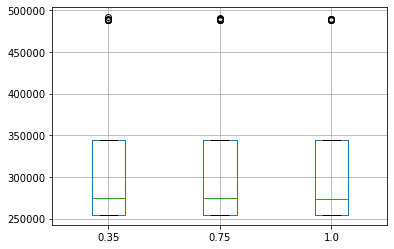

In [9]:
objetivos_medios.unstack(level=taxa_elitismo).boxplot()

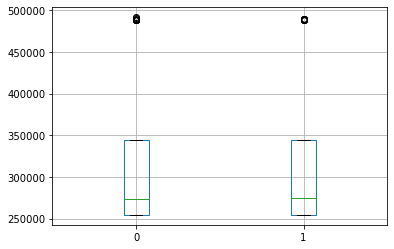

In [10]:
objetivos_medios.unstack(level=tipo_crossover).boxplot()

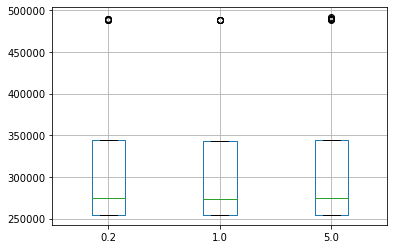

In [11]:
objetivos_medios.unstack(level=taxa_mutacao).boxplot()

In [12]:
objetivos_medios.unstack(level=taxa_mutacao)

0.2            1.0            5.0
200 0.2 3 0 0.35  488778.500000  489037.500000  491786.666667
            0.75  488684.500000  488679.666667  490844.666667
            1.00  488665.000000  488668.000000  489977.666667
          1 0.35  490034.333333  488779.833333  488950.500000
            0.75  490032.833333  488742.333333  489410.833333
            1.00  489729.666667  488766.500000  489491.166667
    0.4 3 0 0.35  293925.166667  293932.000000  295543.833333
            0.75  293894.666667  293891.833333  294907.833333
            1.00  293891.666667  293889.333333  294410.833333
          1 0.35  295862.666667  294061.833333  294257.333333
            0.75  295794.166667  294131.000000  294121.166667
            1.00  295782.000000  294189.833333  294398.333333
    0.6 3 0 0.35  254476.000000  254476.000000  254478.000000
            0.75  254476.000000  254476.000000  254477.666667
            1.00  254476.000000  254476.000000  254476.000000
          1 0.35  254477.333333  254478.000000  254477.000000
            0.75  254477.666667  254478.000000  254477.000000
            1.00  254478.000000  254477.000000  254476.666667
    0.8 3 0 0.35  254476.000000  254476.333333  254478.000000
            0.75  254476.000000  254476.000000  254478.000000
            1.00  254476.000000  254476.000000  254476.333333
          1 0.35  254478.000000  254478.000000  254477.000000
            0.75  254477.666667  254477.333333  254477.333333
            1.00  254478.000000  254477.000000  254476.333333

In [13]:
tempos_medios = tempos_pandas.mean()

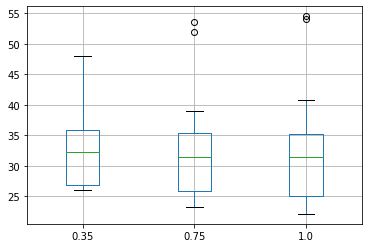

In [14]:
tempos_medios.unstack(level=taxa_elitismo).boxplot()

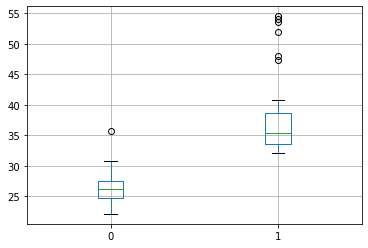

In [15]:
tempos_medios.unstack(level=tipo_crossover).boxplot()

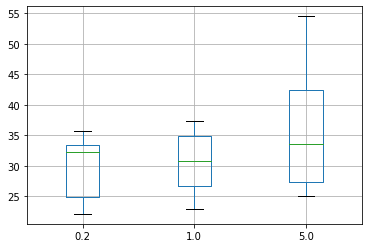

In [16]:
tempos_medios.unstack(level=taxa_mutacao).boxplot()

In [17]:
objs_por_h = objetivos_medios.unstack(level=-5)
tempos_por_h = tempos_medios.unstack(level=-5)

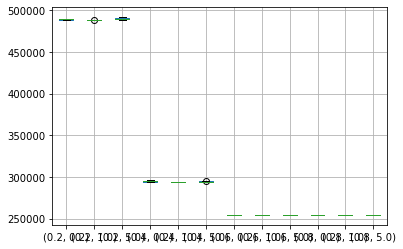

In [18]:
objs_por_h.unstack(level=taxa_mutacao).boxplot()

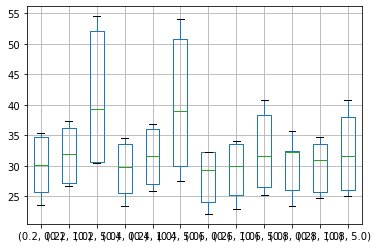

In [19]:
tempos_por_h.unstack(level=taxa_mutacao).boxplot()

In [20]:
tempos_h02 = tempos_por_h.transpose().iloc[0]
tempos_h04 = tempos_por_h.transpose().iloc[1]
tempos_h06 = tempos_por_h.transpose().iloc[2]
tempos_h08 = tempos_por_h.transpose().iloc[3]
objs_h02 = objs_por_h.transpose().iloc[0]
objs_h04 = objs_por_h.transpose().iloc[1]
objs_h06 = objs_por_h.transpose().iloc[2]
objs_h08 = objs_por_h.transpose().iloc[3]

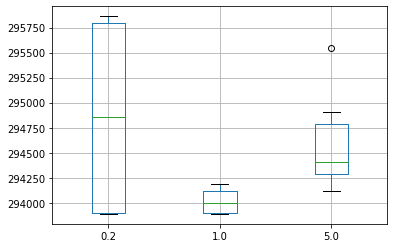

In [21]:
objs_h04.unstack(level=taxa_mutacao).boxplot()

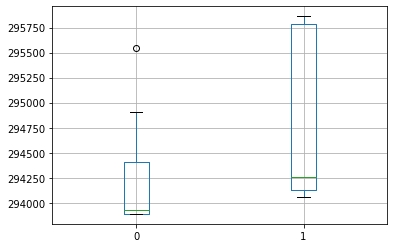

In [22]:
objs_h04.unstack(level=tipo_crossover).boxplot()

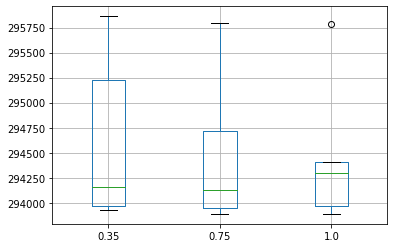

In [23]:
objs_h04.unstack(level=taxa_elitismo).boxplot()

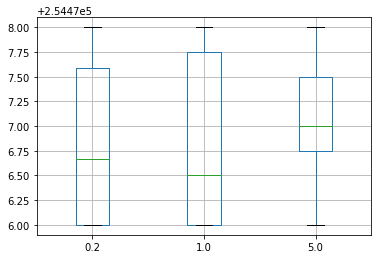

In [24]:
objs_h06.unstack(level=taxa_mutacao).boxplot()

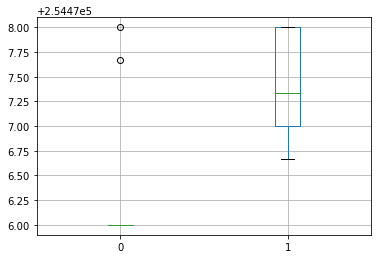

In [25]:
objs_h06.unstack(level=tipo_crossover).boxplot()

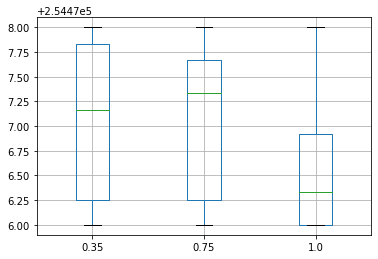

In [26]:
objs_h06.unstack(level=taxa_elitismo).boxplot()

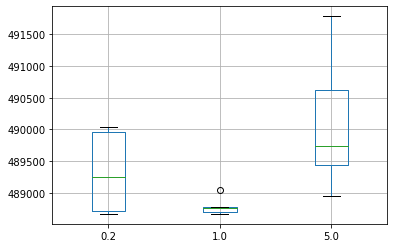

In [27]:
objs_h02.unstack(level=taxa_mutacao).boxplot()

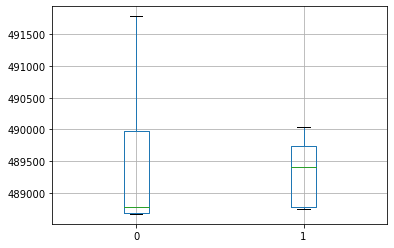

In [28]:
objs_h02.unstack(level=tipo_crossover).boxplot()

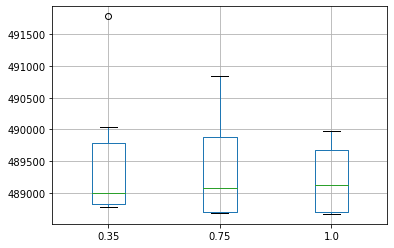

In [29]:
objs_h02.unstack(level=taxa_elitismo).boxplot()

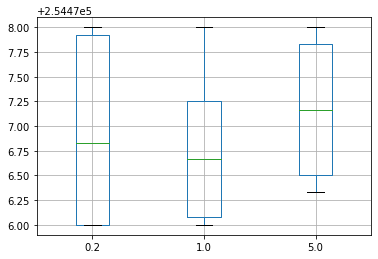

In [30]:
objs_h08.unstack(level=taxa_mutacao).boxplot()

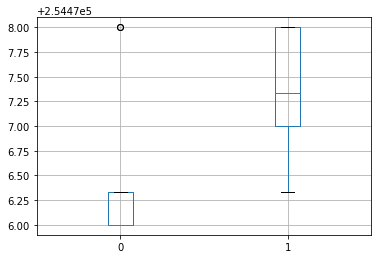

In [31]:
objs_h08.unstack(level=tipo_crossover).boxplot()

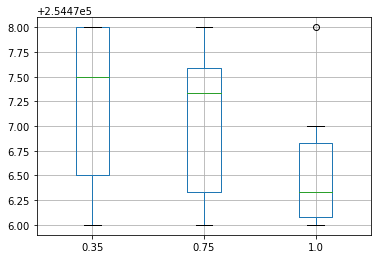

In [32]:
objs_h08.unstack(level=taxa_elitismo).boxplot()

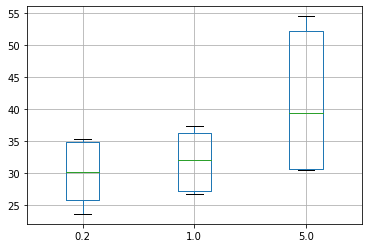

In [33]:
tempos_h02.unstack(level=taxa_mutacao).boxplot()


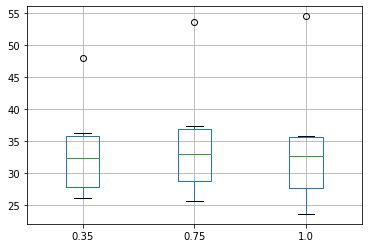

In [34]:
tempos_h02.unstack(level=taxa_elitismo).boxplot()


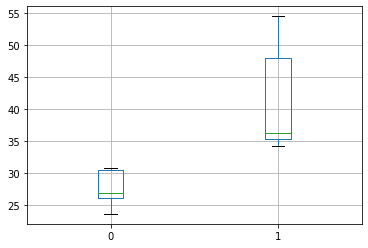

In [35]:
tempos_h02.unstack(level=tipo_crossover).boxplot()

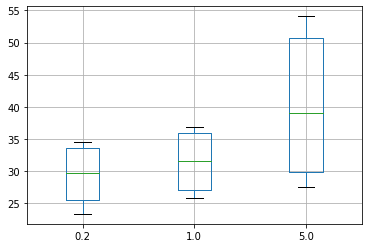

In [36]:
tempos_h04.unstack(level=taxa_mutacao).boxplot()


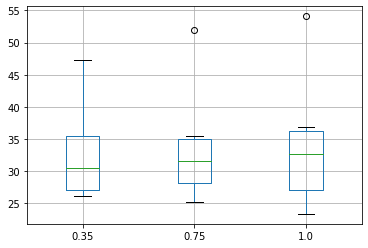

In [37]:
tempos_h04.unstack(level=taxa_elitismo).boxplot()


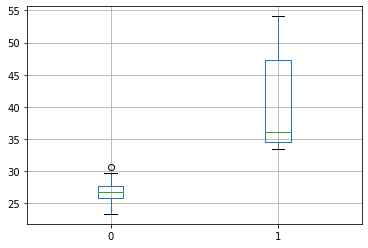

In [38]:
tempos_h04.unstack(level=tipo_crossover).boxplot()

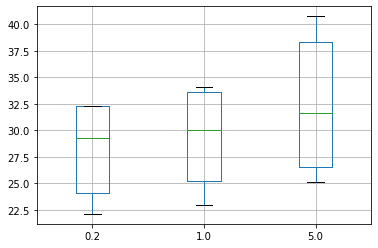

In [39]:
tempos_h06.unstack(level=taxa_mutacao).boxplot()


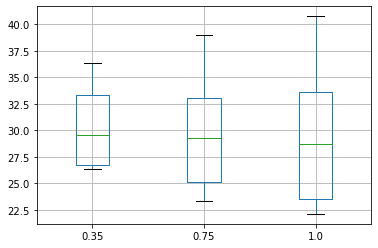

In [40]:
tempos_h06.unstack(level=taxa_elitismo).boxplot()


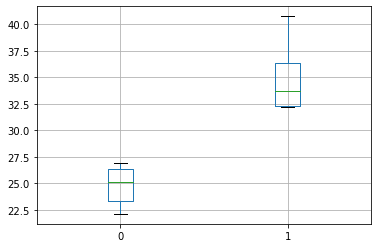

In [41]:
tempos_h06.unstack(level=tipo_crossover).boxplot()

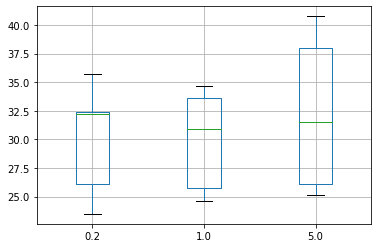

In [42]:
tempos_h08.unstack(level=taxa_mutacao).boxplot()


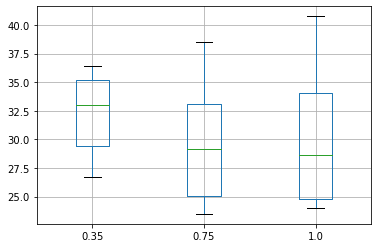

In [43]:
tempos_h08.unstack(level=taxa_elitismo).boxplot()


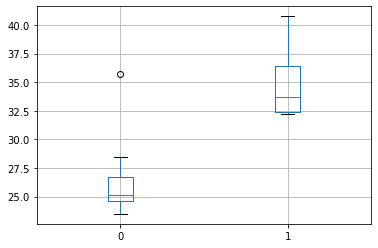

In [44]:
tempos_h08.unstack(level=tipo_crossover).boxplot()

In [45]:
objs_h08

200  3  0.2  0  0.35    254476.000000
                0.75    254476.000000
                1.00    254476.000000
             1  0.35    254478.000000
                0.75    254477.666667
                1.00    254478.000000
        1.0  0  0.35    254476.333333
                0.75    254476.000000
                1.00    254476.000000
             1  0.35    254478.000000
                0.75    254477.333333
                1.00    254477.000000
        5.0  0  0.35    254478.000000
                0.75    254478.000000
                1.00    254476.333333
             1  0.35    254477.000000
                0.75    254477.333333
                1.00    254476.333333
Name: 0.8, dtype: float64